In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
f=pd.read_excel('Data_Train_flight.xlsx')

In [3]:
f.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel('Test_set_flight.xlsx')

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
f.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [7]:
f.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
f.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
f['Date']=f['Date_of_Journey'].str.split('/').str[0]

In [11]:
f['Month']=f['Date_of_Journey'].str.split('/').str[1]

In [12]:
f['Year']=f['Date_of_Journey'].str.split('/').str[2]

In [13]:
f.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [14]:
f=f.drop(['Date_of_Journey'],axis=1)

In [15]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [16]:
f['Arrival_Time']=f['Arrival_Time'].str.split(' ').str[0]

In [17]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [18]:
f[f['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,05,2019


In [19]:
f['Total_Stops']=f['Total_Stops'].fillna('1 Stop')

In [20]:
f['Total_Stops']=f['Total_Stops'].replace('non-stop','0 Stop')

In [21]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 Stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [22]:
f['Total_Stops']=f['Total_Stops'].str.split(' ').str[0]

In [23]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,01,03,2019


In [24]:
f['Total_Stops']=f['Total_Stops'].astype('int')

In [25]:
f.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
dtype: object

In [26]:
f['Arrival_hour']=f['Arrival_Time'].str.split(':').str[0]
f['Arrival_minute']=f['Arrival_Time'].str.split(':').str[1]

In [27]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,06,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,01,03,2019,21,35


In [28]:
f['Dep_hour']=f['Dep_Time'].str.split(':').str[0]
f['Dep_minute']=f['Dep_Time'].str.split(':').str[1]

In [29]:
f.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,05,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,06,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,05,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,01,03,2019,21,35,16,50


In [30]:
f=f.drop(['Arrival_Time','Dep_Time'],axis=1)

In [31]:
f.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,06,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,05,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,01,03,2019,21,35,16,50


In [32]:
f['Duration_hour']=f['Duration'].str.split(' ').str[0]
f['Duration_minute']=f['Duration'].str.split(' ').str[1]

In [39]:
f['Duration_hour']=f['Duration_hour'].str.split('h').str[0]
f['Duration_minute'] =f['Duration_minute'].str.split('m').str[0]

In [35]:
f.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,06,2019,04,25,09,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,05,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,01,03,2019,21,35,16,50,4,45


In [37]:
f['Duration_hour']=f['Duration_hour'].fillna(0)
f['Duration_minute'] =f['Duration_minute'].fillna(0)

In [40]:
f.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,06,2019,04,25,09,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,05,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,01,03,2019,21,35,16,50,4,45


In [41]:
f.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [55]:
f.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [42]:
f.Price.isnull().sum()

0

In [43]:
f.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
Duration_hour         0
Duration_minute    1032
dtype: int64

In [44]:
f['Route_1']=f['Route'].str.split('→ ').str[0]
f['Route_2']=f['Route'].str.split('→ ').str[1]
f['Route_3']=f['Route'].str.split('→ ').str[2]
f['Route_4']=f['Route'].str.split('→ ').str[3]
f['Route_5']=f['Route'].str.split('→ ').str[4]

In [45]:
f.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,03,...,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,...,15,05,50,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,06,...,25,09,25,19,NaN,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,05,...,30,18,05,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,01,03,...,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN


In [46]:
f['Route_1'].fillna('None',inplace=True)
f['Route_2'].fillna('None',inplace=True)
f['Route_3'].fillna('None',inplace=True)
f['Route_4'].fillna('None',inplace=True)
f['Route_5'].fillna('None',inplace=True)

In [47]:
f.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minute        0
Dep_hour              0
Dep_minute            0
Duration_hour         0
Duration_minute    1032
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [48]:
f.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,04,...,25,19,55,2,30,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,04,...,20,20,45,2,35,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,04,...,20,08,20,3,NaN,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0,No info,12648,01,03,...,10,11,30,2,40,BLR,DEL,None,None,None
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2,No info,11753,9,05,...,15,10,55,8,20,DEL,GOI,BOM,COK,None


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
encoder=LabelEncoder()

In [51]:
f['Airline'] = encoder.fit_transform(f['Airline'])
f['Source'] = encoder.fit_transform(f['Source'])
f['Destination'] = encoder.fit_transform(f['Destination'])
f['Route_1'] = encoder.fit_transform(f['Route_1'])
f['Route_2'] = encoder.fit_transform(f['Route_2'])
f['Route_3'] = encoder.fit_transform(f['Route_3'])
f['Route_4'] = encoder.fit_transform(f['Route_4'])
f['Route_5'] = encoder.fit_transform(f['Route_5'])

In [52]:
f.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,BLR → DEL,2h 50m,0,No info,3897,24,03,...,10,22,20,2,50,0,13,24,12,4
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,05,...,15,05,50,7,25,2,25,1,3,4
2,4,2,1,DEL → LKO → BOM → COK,19h,2,No info,13882,9,06,...,25,09,25,19,NaN,3,32,4,5,4
3,3,3,0,CCU → NAG → BLR,5h 25m,1,No info,6218,12,05,...,30,18,05,5,25,2,34,3,12,4
4,3,0,5,BLR → NAG → DEL,4h 45m,1,No info,13302,01,03,...,35,16,50,4,45,0,34,8,12,4


In [53]:
f.drop(['Route','Additional_Info','Duration'],axis=1,inplace=True)

In [54]:
f.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,3897,24,03,2019,01,10,22,20,2,50,0,13,24,12,4
1,1,3,0,2,7662,1,05,2019,13,15,05,50,7,25,2,25,1,3,4
2,4,2,1,2,13882,9,06,2019,04,25,09,25,19,NaN,3,32,4,5,4
3,3,3,0,1,6218,12,05,2019,23,30,18,05,5,25,2,34,3,12,4
4,3,0,5,1,13302,01,03,2019,21,35,16,50,4,45,0,34,8,12,4


In [55]:
f.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int32
Price               int64
Date               object
Month              object
Year               object
Arrival_hour       object
Arrival_minute     object
Dep_hour           object
Dep_minute         object
Duration_hour      object
Duration_minute    object
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
dtype: object

In [56]:
f['Date'] =f['Date'].astype(int)    

In [57]:
f['Month'] =f['Month'].astype(int) 

In [58]:
f['Year'] =f['Year'].astype(int) 



In [59]:
f['Arrival_hour'] =f['Arrival_hour'].astype(int) 


In [60]:
f['Arrival_minute'] =f['Arrival_minute'].astype(int) 


In [61]:
f['Dep_hour'] =f['Dep_hour'].astype(int) 


In [62]:

f['Dep_minute'] =f['Dep_minute'].astype(int)

In [97]:
f.dtypes

Airline             int64
Source              int64
Destination         int64
Total_Stops         int32
Price               int64
Date                int32
Month               int32
Year                int32
Arrival_hour        int32
Arrival_minute      int32
Dep_hour            int32
Dep_minute          int32
Duration_hour      object
Duration_minute     int32
Route_1             int64
Route_2             int64
Route_3             int64
Route_4             int64
Route_5             int64
dtype: object

In [64]:
f['Duration_hour']=f['Duration_hour'].replace('5m','5')

In [65]:
f['Duration_hour'] =f['Duration_hour'].astype(int)

In [66]:
f.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,3897,24,3,2019,1,10,22,20,2,50,0,13,24,12,4
1,1,3,0,2,7662,1,5,2019,13,15,5,50,7,25,2,25,1,3,4
2,4,2,1,2,13882,9,6,2019,4,25,9,25,19,NaN,3,32,4,5,4
3,3,3,0,1,6218,12,5,2019,23,30,18,5,5,25,2,34,3,12,4
4,3,0,5,1,13302,1,3,2019,21,35,16,50,4,45,0,34,8,12,4


In [67]:
f.dtypes

Airline             int32
Source              int32
Destination         int32
Total_Stops         int32
Price               int64
Date                int32
Month               int32
Year                int32
Arrival_hour        int32
Arrival_minute      int32
Dep_hour            int32
Dep_minute          int32
Duration_hour       int32
Duration_minute    object
Route_1             int32
Route_2             int32
Route_3             int32
Route_4             int32
Route_5             int32
dtype: object

In [78]:
f['Duration_minute'] =f['Duration_minute'].fillna(0)

In [80]:
X=f.drop('Price',axis='columns')
y=f['Price']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr=LinearRegression()

In [85]:
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
predictions=lr.predict(X_test)

In [87]:
lr.score(X_test,y_test)

0.5102691244294202

In [88]:
lr.score(X_train,y_train)

0.4892645626296268

In [90]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE: 2270.2221442959503
MSE: 9712307.534657905
RMSE: 47.6468482094666


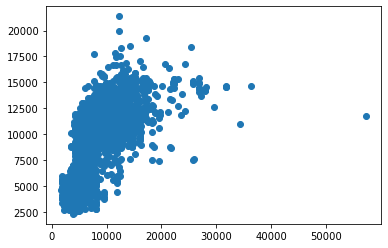

In [100]:
plt.scatter(y_test,predictions)

In [102]:
lr.predict([[1,0,5,0,24,3,2019,1,10,22,20,2,50,0,13,24,12,4]])

array([6244.76094709])